In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
# warnings.filterwarnings('ignore')
sns.set()

In [3]:
df = pd.read_csv('data/preprocessed/cleaned.csv').drop(columns=['Unnamed: 0'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Non-Edible,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


## Missing Values Imputation

In [4]:
df['Item_Visibility'] = np.where(df['Item_Visibility']==0.,np.NAN, df['Item_Visibility'])

In [5]:
(df.isnull().sum()/df.shape[0])*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               6.171536
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
New_Item_Type                 0.000000
Outlet_Age                    0.000000
dtype: float64

In [6]:
cols_to_process = ["Item_Weight", "Item_Visibility", "Outlet_Size"]

In [7]:
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer

In [8]:
not_missing = [not i for i in df['Outlet_Size'].isnull()]

In [9]:
missing = df['Outlet_Size'].isnull()

In [10]:
df[missing].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,2410.000000,2266.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,12.778479,0.074724,140.322946,2003.000000,1822.626947,10.000000
std,4.589825,0.053730,62.397904,3.506502,1557.858015,3.506502
min,4.590000,0.003599,32.090000,1998.000000,33.290000,6.000000
25%,8.785000,0.033101,93.096200,2002.000000,554.777850,6.000000
50%,12.600000,0.061206,142.165400,2002.000000,1443.454400,11.000000
75%,16.700000,0.104338,185.135800,2007.000000,2681.509500,11.000000
max,21.350000,0.311090,266.888400,2007.000000,9664.752800,15.000000


In [11]:
df[not_missing].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,4650.000000,5731.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.898675,0.068805,141.256859,1995.794373,2322.688445,17.205627
std,4.670973,0.048792,62.229701,8.842615,1741.592093,8.842615
min,4.555000,0.003575,31.290000,1985.000000,33.955800,4.000000
25%,8.770000,0.030949,94.012000,1987.000000,974.731200,9.000000
50%,12.650000,0.056696,143.178600,1997.000000,1928.156800,16.000000
75%,17.000000,0.096293,185.892400,2004.000000,3271.075400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [12]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'New_Item_Type', 'Outlet_Age'],
      dtype='object')

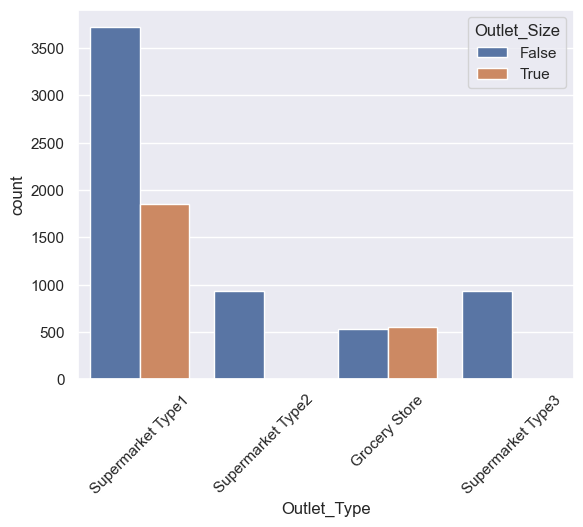

In [13]:
sns.countplot(x =df['Outlet_Type'], hue=missing)
plt.xticks(rotation = 45)
plt.show()

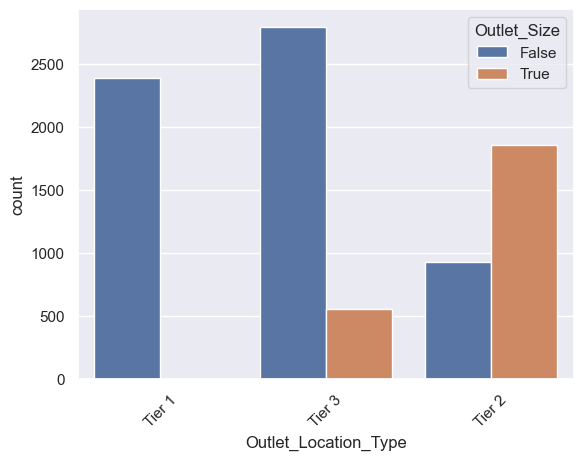

In [14]:
sns.countplot(x =df['Outlet_Location_Type'], hue=missing)
plt.xticks(rotation = 45)
plt.show()

In [15]:
pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


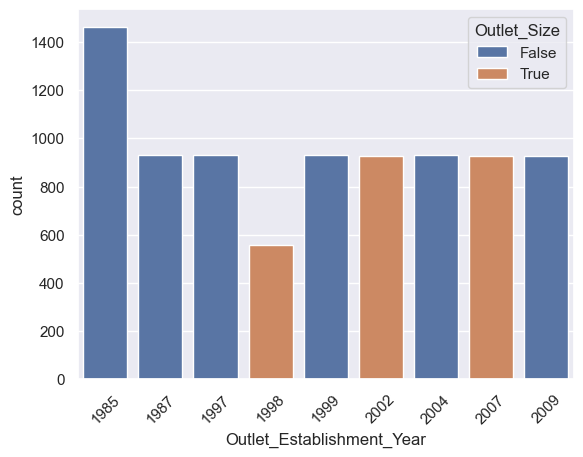

In [16]:
sns.countplot(x =df['Outlet_Establishment_Year'], hue=missing)
plt.xticks(rotation = 45)
plt.show()

In [17]:
missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

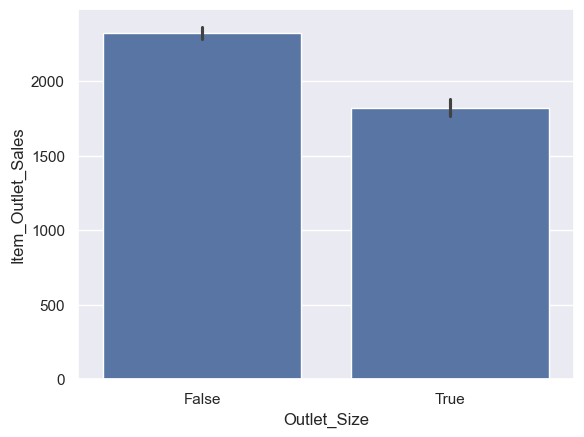

In [18]:
sns.barplot(x = missing, y=df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Size', ylabel='Item_MRP'>

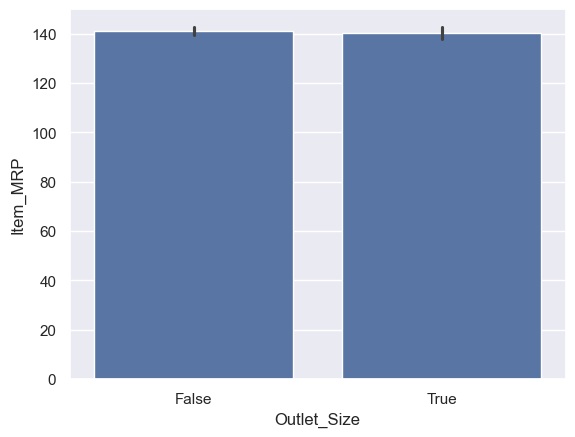

In [19]:
sns.barplot(x = missing, y=df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

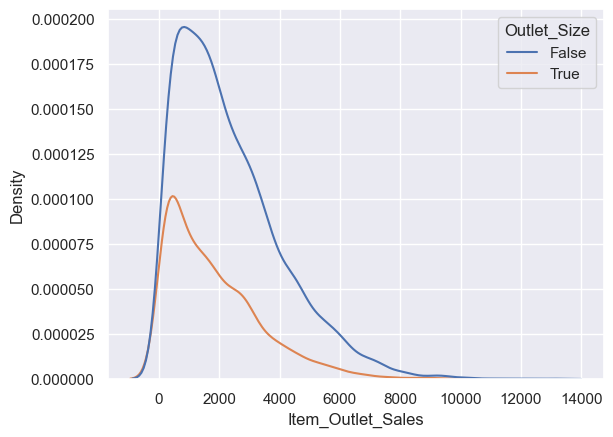

In [20]:
sns.kdeplot(x = df['Item_Outlet_Sales'], hue=missing)

In [21]:
MODE = df['Outlet_Size'].mode()
MODE

0    Medium
Name: Outlet_Size, dtype: object

In [22]:
knni = KNNImputer(n_neighbors=5, weights='distance')

In [23]:
df['Outlet_Size_mode'] = np.where(missing, MODE, df['Outlet_Size'])

In [24]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'New_Item_Type', 'Outlet_Age', 'Outlet_Size_mode'],
      dtype='object')

In [25]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [26]:
df['temp'] = df['Outlet_Size'].replace({
    'Small' : 0,
    'Medium' : 1,
    'High': 2
})

C:\Users\Parag\AppData\Local\Temp\ipykernel_18384\331979750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['temp'] = df['Outlet_Size'].replace({


In [28]:
df['temp']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: temp, Length: 8523, dtype: float64

In [29]:
df['Outlet_Size_knn'] = knni.fit_transform(X = df[['Outlet_Age', 'Item_Outlet_Sales', 'Item_Visibility', 'temp']])[:,-1]

In [30]:
df['Outlet_Size_knn'] = knni.fit_transform(X = df[['Outlet_Age', 'Item_Outlet_Sales', 'Item_Visibility', 'temp']])[:,-1]

In [31]:
df['Outlet_Size_knn'] = df['Outlet_Size_knn'].apply(lambda x: int(1+x))

In [32]:
df['Outlet_Size_knn']

0       2
1       2
2       2
3       1
4       3
       ..
8518    3
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Size_knn, Length: 8523, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

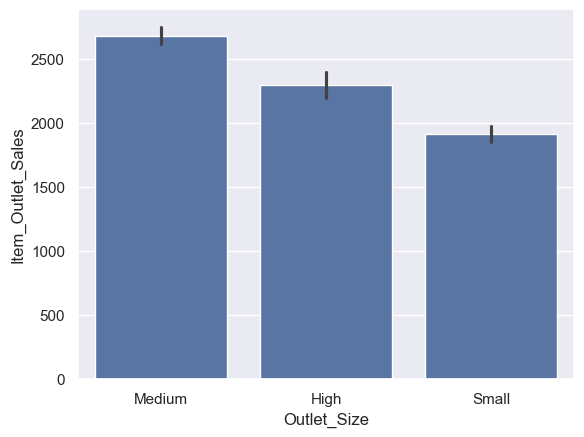

In [33]:
sns.barplot(x = df['Outlet_Size'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Size_knn', ylabel='Item_Outlet_Sales'>

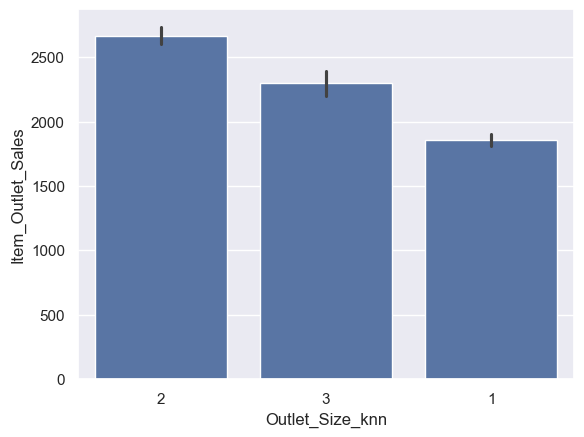

In [34]:
sns.barplot(x = df['Outlet_Size_knn'], y = df['Item_Outlet_Sales'], order=[2,3,1])

<Axes: xlabel='Outlet_Size_mode', ylabel='Item_Outlet_Sales'>

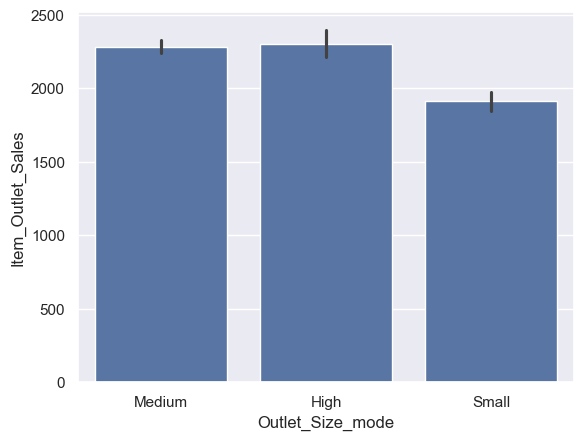

In [35]:
sns.barplot(x = df['Outlet_Size_mode'], y = df['Item_Outlet_Sales'])

In [36]:
cols_to_process

['Item_Weight', 'Item_Visibility', 'Outlet_Size']

In [37]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [38]:
missing = df['Item_Weight'].isnull()

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

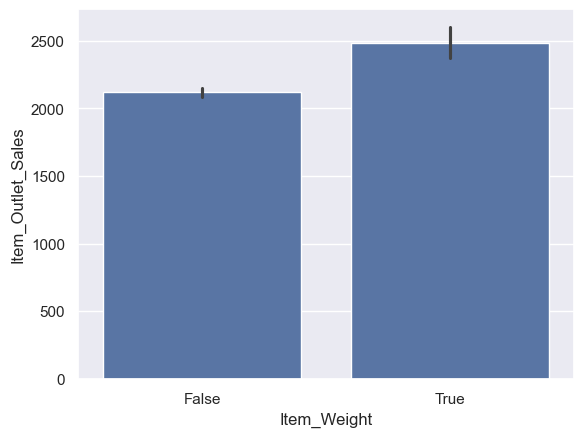

In [39]:
sns.barplot(x = missing, y = df['Item_Outlet_Sales'])

In [40]:
knni2 = KNNImputer(n_neighbors=5, weights='distance')

In [41]:
MEAN = df['Item_Weight'].mean()

In [42]:
df['Item_Weight_knn'] = knni2.fit_transform(X = df[['Outlet_Age', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']])[:,-1]
df['Item_Weight_mean'] = np.where(missing, MEAN, df['Item_Weight'])

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

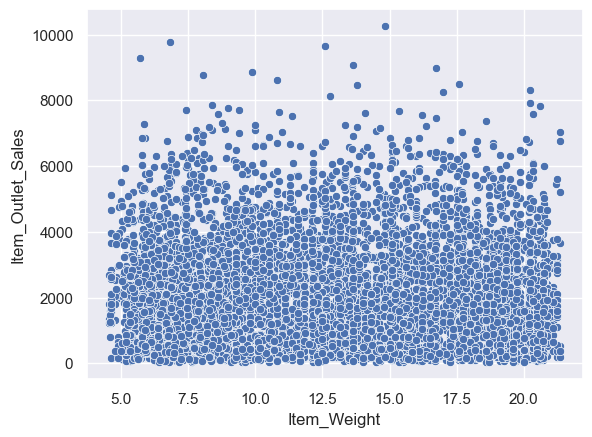

In [43]:
sns.scatterplot(x = df['Item_Weight'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Weight_knn', ylabel='Item_Outlet_Sales'>

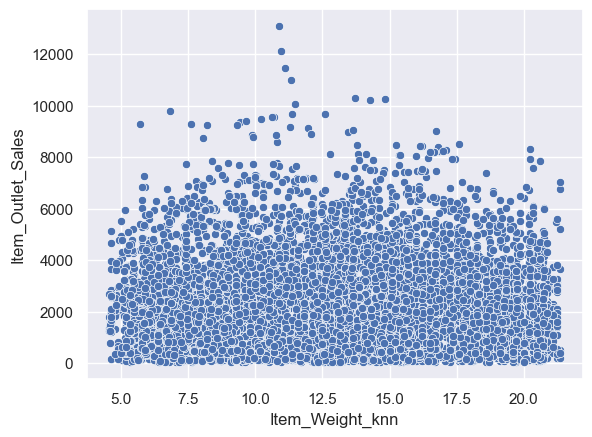

In [44]:
sns.scatterplot(x = df['Item_Weight_knn'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Weight_mean', ylabel='Item_Outlet_Sales'>

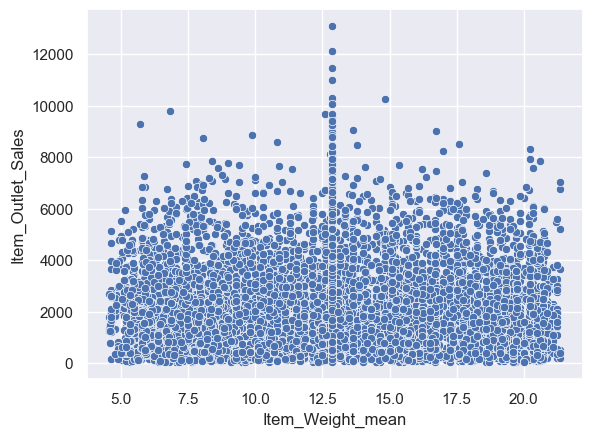

In [45]:
sns.scatterplot(x = df['Item_Weight_mean'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Weight', ylabel='Density'>

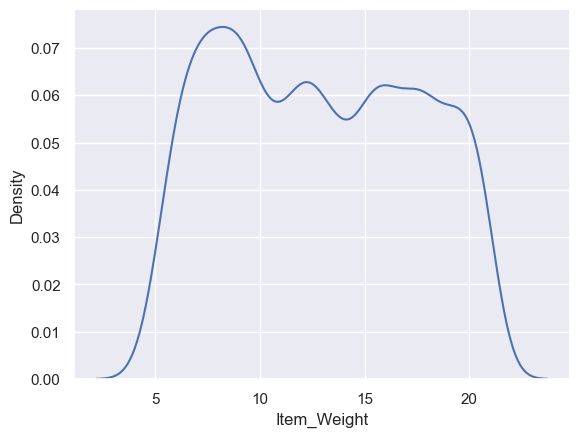

In [46]:
sns.kdeplot(x = df['Item_Weight'])

<Axes: xlabel='Item_Weight_knn', ylabel='Density'>

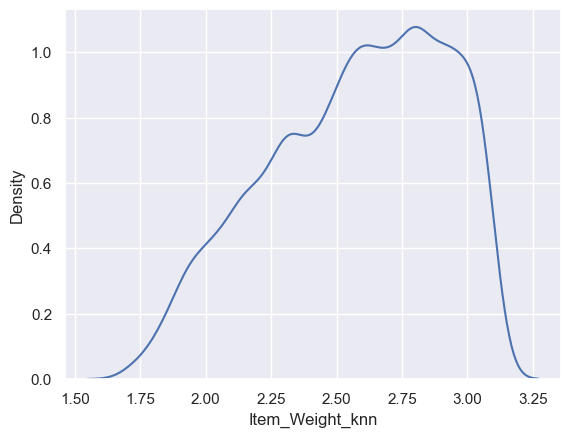

In [47]:
sns.kdeplot(x = np.log1p(df['Item_Weight_knn']))

In [48]:
cols_to_process

['Item_Weight', 'Item_Visibility', 'Outlet_Size']

In [49]:
df['Item_Visibility'].isnull().sum()

526

In [50]:
knni3 = KNNImputer(n_neighbors=5, weights='distance')

In [51]:
MEAN = df['Item_Visibility'].mean()

In [52]:
df['Item_Visibility_knn'] = knni2.fit_transform(X = df[['Outlet_Age', 'Item_Outlet_Sales', 'Item_Weight_knn', 'temp','Item_Visibility']])[:,-1]
df['Item_Visibility_mean'] = np.where(missing, MEAN, df['Item_Visibility'])

In [53]:
MEAN

0.07048184085069402

<Axes: xlabel='Item_Visibility', ylabel='Density'>

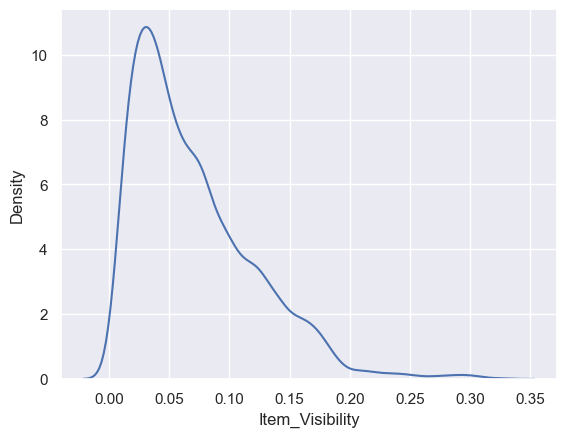

In [54]:
sns.kdeplot(df['Item_Visibility'])

<Axes: xlabel='Item_Visibility_knn', ylabel='Density'>

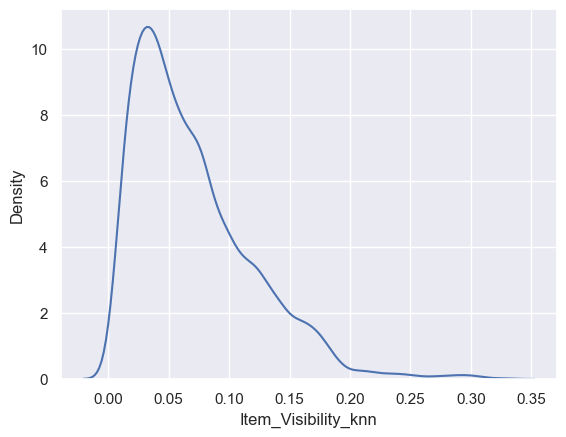

In [55]:
sns.kdeplot(df['Item_Visibility_knn'])

<Axes: xlabel='Item_Visibility_mean', ylabel='Density'>

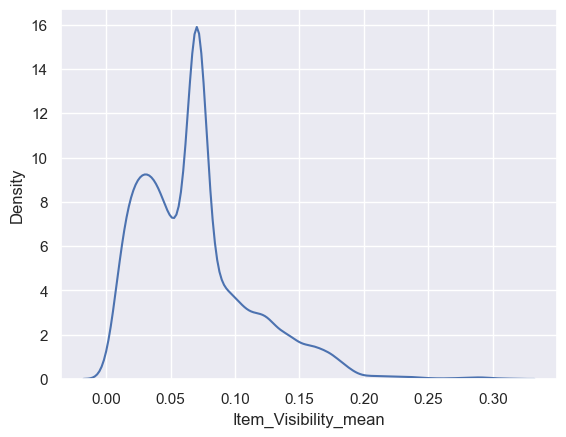

In [56]:
sns.kdeplot(df['Item_Visibility_mean'])

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

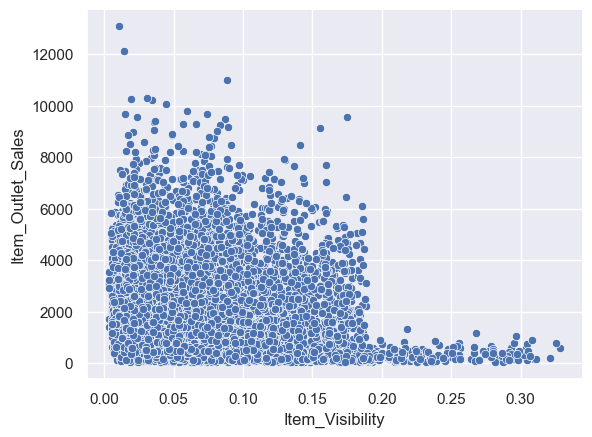

In [57]:
sns.scatterplot(x = df['Item_Visibility'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility_knn', ylabel='Item_Outlet_Sales'>

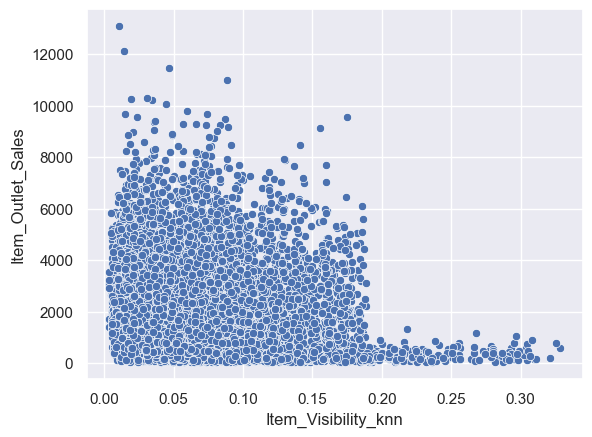

In [58]:
sns.scatterplot(x = df['Item_Visibility_knn'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility_mean', ylabel='Item_Outlet_Sales'>

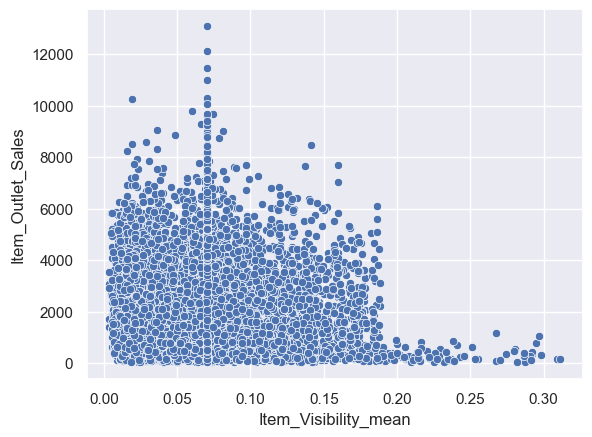

In [59]:
sns.scatterplot(x = df['Item_Visibility_mean'], y = df['Item_Outlet_Sales'])

## Remarks

1) Missing Values in Item Weight, Outlet Size columns
2) Many zeros in Item Visibility Column (May be zero values are missing values) and outliers in left side.
3) Item weight is approximately normally distributed without any outliers.
4) Item Visibility can be made normal using sqrt transform.
5) The distribution of Item MRP is Multimodal, we need to split this feature using Discritization.
6) Outlet sales (target) distribution is highly right skewed, can be made nearly normal using log transform (log1p) -> reduces no. of outliers
7) Column New Item Type have imbalanced frequencies, similarly Outlet Type column also
8) New Item type and Item fat content are highly correlated (corr = 0.729)
9) Outlet age and Outlet Location type are also highly correlated (corr = 0.739)
10) Outlet age, Outlet Location Type, Outlet Size, Outlet Type are correlated with each other
11) Outlet_Age should be converted to discrete categorical variable using Discritization.
12) Missing Values from column Outlet size are mostly from establishment year 1998, 2002, and 2009.
13) KNN imputation is best for Outlet Size column -> features_used: 'Outlet_Age', 'Item_Outlet_Sales', 'Item_Visibility' encoding : 'Ordinal encoding'
14) KNN imputation may also be beneficial for Item Weight, same feature used as above. It also make the distribution normal. Normality may increase when log1p is used (a bit left skewness).
15) KNN imputation also gives good result on Item visibility column, when used with all previous features.